# The Effect of Common Features on Ford GoBike Data

### by Khalid AlQublan

## Investigation Overview

> In this investigation, I wanted to look at customer characteristics and common features on Ford GoBike data.The main focus was on common varibles : trip duration (mintes), user type, age, gender, and month of the trip .

## Dataset Overview

> The data consisted of 446248 bike trips logs for Ford GoBike in 2017 (from Jun to December).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('goBike_data.csv')

## Distribution of Trips Duration

>The trips duration in the dataset take on a very large range of unusual values,the maximum duration was 1438 min around 24 hours , while 75% of trip duration is 14 min.

> Plotted on a logarithmic scale, the distribution of trips duration takes on a normal-distribution shape with duration aveger around 10 min .


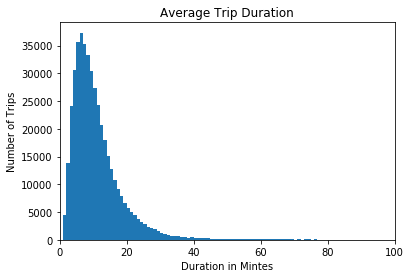

In [3]:
#histogram: data plotted in natural units
bin_edges = np.arange(0,df['duration_min'].max() +1,1)
plt.hist(data = df, x = 'duration_min',bins = bin_edges);
plt.xlim(0,100)
plt.xlabel('Duration in Mintes');
plt.title('Average Trip Duration');
plt.ylabel('Number of Trips');


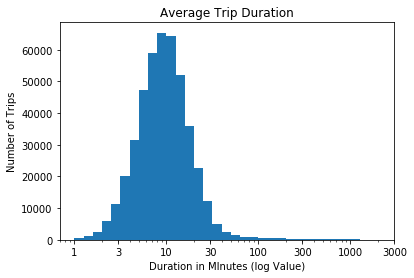

In [4]:

# histogram trip duration (mintes) after log transformation .
bin_edges = 10 ** np.arange(0, np.log10(df.duration_min.max())+0.1, 0.1)
plt.hist(df.duration_min, bins = bin_edges);
plt.xscale('log');
tick_locs = [1,3,10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('Duration in MInutes (log Value)');
plt.title('Average Trip Duration');
plt.ylabel('Number of Trips');

## Proportions of Gender & User Types

> Males have a massive proportion in riding bike with 78% of total rides while females 22% .

>There are two user types in GoBike data , subscribers with 89% and cutomers with 11% of overall rides.  

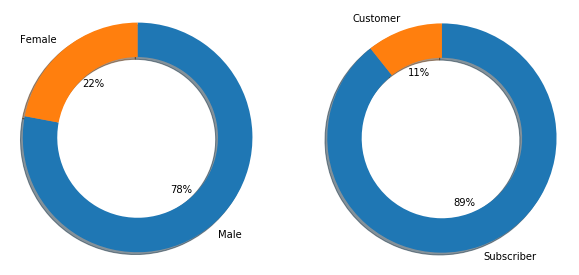

In [5]:
# code for the donut charts for gender and User type
plt.figure(figsize = [10,5])

plt.subplot(1, 2, 1);

sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.3} ,autopct='%1.0f%%',shadow=True);
plt.axis('square');


plt.subplot(1, 2, 2);
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.3} , autopct='%1.0f%%' ,shadow=True);
plt.axis('square');






## Total Number of Rides per Month 

> The dataset contains seven months from Jun to December.

> October,November and September respectively , were the most number of rides than the other months. 



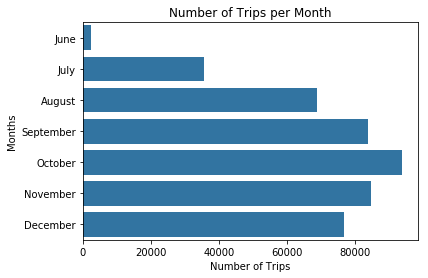

In [6]:
# crear chart for number of trips per each month.

month_order = ['June', 'July', 'August', 'September','October','November','December']

base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'month', color = base_color , order = month_order);
plt.xlabel('Number of Trips');
plt.ylabel('Months');
plt.title('Number of Trips per Month');

## Ages vs Trips

> Ages group to stages ( <20s, 20s,30s,40s,50s,60s and 70s) 

> Rank stages in number of trips :

1. 30s with 40.3%.
2. 20s with 27%.
3. 40s with 19.4%.
4. 50s with 10%.
5. 60s with 2.5%.
6. <20s with 0.5%.
7. 70s with 0.3%.



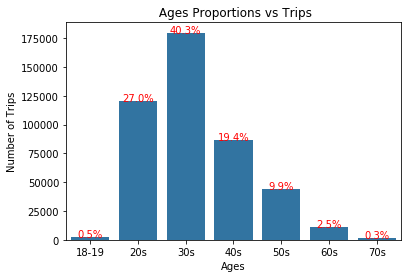

In [7]:
# chnage data type to be in order . 
df['age_group']=df.age_group.astype('category')

# plot age group .
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'age_group', color= base_color ) ;
plt.xlabel('Ages');
plt.title(' Ages Proportions vs Trips');
plt.ylabel('Number of Trips');


# add annotations to show percentages for each age group .
n_trip = df.shape[0]
trip_counts = df['age_group'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

# get the text property for the label to get the correct count
     count = trip_counts[label.get_text()]
     pct_string = '{:0.1f}%'.format(100*count/n_trip);

# print the annotation just below the top of the bar
     plt.text(loc, count-8, pct_string, ha = 'center', color = 'r');


## Gender & Age Relation 

> The relation between gender riders and thier ages shows that males ride much more than females in all age groups.

> Furthermore, the Rank stages in males is same as females.

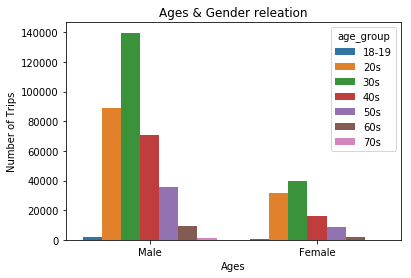

In [8]:
# display Bar chart for two varibless.

sb.countplot(data = df, x = 'member_gender', hue = 'age_group');

plt.xlabel('Ages');
plt.title('Ages & Gender releation');
plt.ylabel('Number of Trips');

## Duration trip , Gender and Age stage Relationships

>The relationships between 3 features appear that female spend much more time per trip the males in all age stages expect 70s.

>Ages below 20s years old take longer trip duration than other ages in both genders.

>Males age stages from 20s to 60s almost senpd same trip period, while females have disparate trips duration for the same .

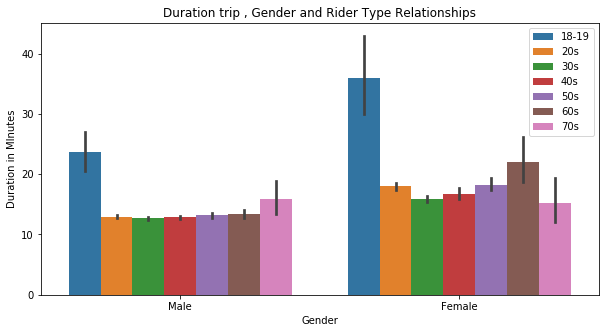

In [9]:
# clustered bar chart using the barplot function .
plt.figure(figsize = [10,5])
g = sb.barplot(data = df, x = 'member_gender', y = 'duration_min', hue = 'age_group')
#g.legend(loc = 8, ncol = 3, framealpha = 1, title = 'User Type');

g.legend()
plt.xlabel('Gender');
plt.title('Duration trip , Gender and Rider Type Relationships');
plt.ylabel('Duration in MInutes');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [10]:
!jupyter nbconvert <slide_deck_GoBike.ipynb>.ipynb --to slides --post serve --template output_toggle